In [1]:
import pandas as pd
import numpy as np
import requests
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import re
import pytesseract

In [2]:
data = pd.read_csv("..\\inv\\airtableFinal.csv")

In [3]:
data.columns

Index(['Title/ Name ', 'Flavors', 'Front Screenshots', 'Back Screenshots',
       'FRONT Removed Background', 'BACK Removed Background',
       'Front shadow w/ removed background',
       'Colored Front card w/ shadow and name',
       'Colored Back card w/ shadow and name',
       'Errunds inc. WM, Colored Front card w/ shadow and name',
       'Errunds inc. WM, Colored Back card w/ shadow and name',
       'TYCA WM, Colored Front card w/ shadow and name',
       'TYCA WM, Colored Back card w/ shadow and name'],
      dtype='object')

In [5]:
pytesseract.pytesseract.tesseract_cmd = "C:\\Manank\\misc\\tesseract-ocr\\tesseract.exe"

In [6]:
def checkWords(text):
    words = ["Access Denied", "URL signature expired", "product not available", "This XML file does not appear to have any sytle information associated with it. The document tree is shown below.", "The page you're looking for couldn't be found"]
    for word in words:
        if re.search(word, text):
            return True

In [6]:
def check(url):
    image = Image.open(requests.get(url, stream=True).raw)
    image = np.asarray(image)
    
    text = pytesseract.image_to_string(image)
    return checkWords(text)

In [11]:
def check2(url):
    image = Image.open(requests.get(url, stream=True).raw)
    image = np.asarray(image)
    
    text = pytesseract.image_to_string(image)
    plt.imshow(image)
    plt.show()
    return text

In [87]:
error = []

In [102]:
for index, _ in data[575:].iterrows():
    if not pd.isnull(data.at[index, 'Back Screenshots']):
        fileName = data.at[index, 'Back Screenshots'].split()[-1]
        url = re.sub("['(', ')']", "", fileName)
        status = check(url)
        print(index+1, status)
        if status == True:
            error.append(index+1)

577 None
578 None
580 None
581 None
582 None
583 None
584 None
585 None
594 None
595 None
596 None
602 None
603 None
604 None
605 None
606 None
607 None
614 None
615 None
619 None
625 None
626 None
640 None
645 None
649 None
650 None
651 None
652 None
657 None
662 None
669 None
670 None
673 None
674 None
675 None
676 None
677 None
678 None
679 None
680 None
681 None
682 None
684 None
685 None
686 None
687 None
688 None
692 None
695 None
710 None
742 None
743 None
744 None
746 None
747 None
750 None
751 None
755 None
758 None
761 None
764 None
765 None
766 None
768 None
770 None
801 None
802 None
803 None
808 None
829 None
860 None
862 None
863 None
864 None
865 None
867 None
868 None
869 None
870 None
871 None
872 None
873 None
875 None
877 None
878 None
879 None
880 None
881 None
882 None
883 None
885 None
887 None
893 None
895 None
896 None
897 None
898 None
899 None
900 None
901 None
903 None
904 None
905 None
906 None
907 None
913 None
915 None
916 None
917 None
920 None
924 None
9

In [91]:
error

[]

In [7]:
def urlCheck(index):
    front = data['Back Screenshots']
    f = front[index].split()[-1]
    f = re.sub("['(', ')']", "", f)
    return f

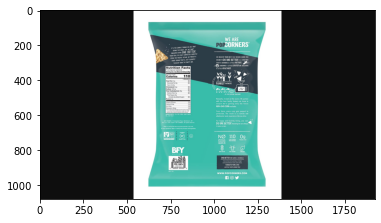

"TT\n\nWE ARE\n; TORNERS’\n\nvrs a a a LF A\nNG THE MOST JY, WCE\nusen o0n ONE BETTER\nwar RAL SE SALT HAMEED DET\nOM THE PAC CEA, WE PREFER A ve ount meus suum\n\nINR GRAIN THAT'S JUST SLIGHTLY ecwero DO ONE BETTE\nTHICKER THAN THE SALTY AR THAT'S RUNNING A LITTLE FARTHER,\nLAUGHING & LITTLE LOUDER OR SNACKING\nUTTUe HEALTHIER.\n\nFAMILY races\n\n10 THE POPPING NACI\n\nNaturally, it starts at the source. We partner\nwith the best family farmers we know to\nensure we're getting only the finest\n\nNON-GMO CORN available.\n\nseammeeecns From there, every crop gets popped to\nWGREDIERTS YELLOW CO, SNFLONER perfection. The result is a crunchy and\nOt SENSAy wholesome taste experience tke no other\n\nBr UO, 79 nec Min For happy and healthy living, you con aa”\n4 DO ONE BETTER inva wes oto\n\nNeck ron: a ky tt oc i ete.\n\nVEO N® 110 0g\n\naariient CALORIES reans rar\niisese\n\n8\n\nONE BETTERron‘asus scHoa.s\n\nFARMZFUTURE.ORS\nERE THER CORE 0\n\nWWW.POPCORNERS.COM\n\nHoy\n\n \n\x0c"

In [15]:
check2(urlCheck(12))